## DrugBank Data Exploration 

In [1]:
import pandas as pd
import re

In [2]:
drug_dir = '../data/drugbank/'

#### Drugs ids with names

In [3]:
drugs = pd.read_csv(drug_dir + 'drug_id_name_map.csv', index_col=[0])
drugs.head()

,id,drug_name
1,DB00001,Lepirudin
2,DB00002,Cetuximab
3,DB00003,Dornase alfa
4,DB00004,Denileukin diftitox
5,DB00005,Etanercept


In [4]:
num_drugs = drugs.shape[0]
print(f'Number of drugs in dataset is {num_drugs}')

Number of drugs in dataset is 4225


#### Drugs classification

In [5]:
drug_class = pd.read_csv(drug_dir + 'drug_classification.csv', index_col=[0])

In [6]:
drug_class.head()

,id,kingdom,superclass,class,subclass,substituent
1,DB00001,Organic Compounds,Organic Acids,Carboxylic Acids and Derivatives,"Amino Acids, Peptides, and Analogues",NaN
2,DB00002,Organic Compounds,Organic Acids,Carboxylic Acids and Derivatives,"Amino Acids, Peptides, and Analogues",NaN
3,DB00003,Organic Compounds,Organic Acids,Carboxylic Acids and Derivatives,"Amino Acids, Peptides, and Analogues",NaN
4,DB00004,Organic Compounds,Organic Acids,Carboxylic Acids and Derivatives,"Amino Acids, Peptides, and Analogues",NaN
5,DB00005,Organic Compounds,Organic Acids,Carboxylic Acids and Derivatives,"Amino Acids, Peptides, and Analogues",NaN


In [7]:
subclasses = set(drug_class['subclass'].dropna())
print('Number of subclasses:',len(subclasses))
list(subclasses)[:10]

Number of subclasses: 324


['Cyclopentyl nucleosides',
 "3'-thia pyrimidine nucleosides",
 'Alkali metal hydroxides',
 'Alpha-keto acids and derivatives',
 "Purine 2',3'-dideoxyribonucleosides",
 'Halomethanes',
 'Piperidinecarboxylic acids and derivatives',
 'Phenoxy compounds',
 'N-alkylindoles',
 'Transition metal pyrophosphates']

In [8]:
drug_class.groupby('subclass').count()

,id,kingdom,superclass,class,substituent
subclass,,,,,
"1,3,5-triazinanes",2,2,2,2,2
"1,3-isoquinolinediones",1,1,1,1,1
"1,4-benzodiazepines",23,23,23,23,23
"1,4-dioxanes",1,1,1,1,1
1-benzopyrans,10,10,10,10,10
...,...,...,...,...,...
Tyrosols and derivatives,4,4,4,4,4
Ureas,7,7,7,7,7
Vinyl chlorides,1,1,1,1,1


#### Drugs interactions

In [9]:
interactions = pd.read_csv(drug_dir + 'drug_interactions.csv', index_col=[0])

In [10]:
interactions.head()

,id,drug_name,description
1,DB06605,Apixaban,Apixaban may increase the anticoagulant activi...
2,DB06695,Dabigatran etexilate,Dabigatran etexilate may increase the anticoag...
3,DB01254,Dasatinib,The risk or severity of bleeding and hemorrhag...
4,DB01609,Deferasirox,The risk or severity of gastrointestinal bleed...
5,DB01586,Ursodeoxycholic acid,The risk or severity of bleeding and bruising ...


In [11]:
print(interactions.description[3])
print('Number of all interactions: %d' % interactions.shape[0])

The risk or severity of bleeding and hemorrhage can be increased when Dasatinib is combined with Lepirudin.
Number of all interactions: 1951665


In [12]:
agg_interactions = interactions.drop(['description'], axis=1)
agg_interactions = agg_interactions.rename(columns={'drug_name': 'count'})
agg_interactions = agg_interactions.groupby(by='id').count().sort_values(by='count', ascending=False)
agg_interactions.head(20)

,count
id,
DB00908,2491
DB00363,2479
DB00477,2464
DB00321,2388
DB00458,2384
DB00564,2375
DB01142,2324
DB09241,2299
DB01242,2299


#### Drugs mixtures

In [13]:
mixtures = pd.read_csv(drug_dir + 'drug_mixtures.csv', index_col=[0])

In [14]:
mixtures.head()

,drug_name,ingredient,ingredients_id
1,Refludan,Lepirudin,DB00001
2,Erbitux,Cetuximab,DB00002
3,Pulmozyme,Dornase alfa,DB00003
4,Pulmozyme 1mg/ml,Dornase alfa,DB00003
5,Ontak,Denileukin diftitox,DB00004


#### Drug InChi key

In [15]:
inchi_key = pd.read_csv(drug_dir + 'drug_inchi_key.csv', index_col=[0])
inchi_key.head()

,id,inchi_key
1,DB00006,OIRCOABEOLEUMC-GEJPAHFPSA-N
2,DB00007,GFIJNRVAKGFPGQ-LIJARHBVSA-N
3,DB00014,BLCLNMBMMGCOAS-URPVMXJPSA-N
4,DB00027,NDAYQJDHGXTBJL-MWWSRJDJSA-N
5,DB00035,NFLWUMRGJYTJIN-PNIOQBSNSA-N


#### Drug salts

In [16]:
salts = pd.read_csv(drug_dir + 'drug_salts.csv', index_col=[0])
print('Number of salts: %d' % salts.shape[0])
salts.head()

Number of salts: 1849


,id,name,cas_number,inchi_key,drug
1,DBSALT000105,Leuprolide acetate,74381-53-6,YFDMUNOZURYOCP-XNHQSDQCSA-N,DB00007
2,DBSALT003182,Leuprolide mesylate,944347-41-5,MBIDSOMXPLCOHS-XNHQSDQCSA-N,DB00007
3,DBSALT001439,Sermorelin acetate,114466-38-5,NaN,DB00010
4,DBSALT000093,Goserelin acetate,145781-92-6,IKDXDQDKCZPQSZ-JHYYTBFNSA-N,DB00014
5,DBSALT001733,Insulin human zinc suspension,NaN,NaN,DB00030


### Food interactions 

In [17]:
food_interactions = pd.read_csv(drug_dir + 'drug_food_interactions.csv', index_col=[0])

In [18]:
food_interactions.head()

,id,description
1,DB00001,Avoid herbs and supplements with anticoagulant...
2,DB00006,Avoid echinacea.
3,DB00006,Avoid herbs and supplements with anticoagulant...
4,DB00008,Drink plenty of fluids.
5,DB00009,Avoid herbs and supplements with anticoagulant...


In [19]:
print('Number of all interactions:', food_interactions.shape[0])

Number of all interactions: 2354


In [20]:
list(food_interactions.description.values)[:5]

['Avoid herbs and supplements with anticoagulant/antiplatelet activity. Examples include garlic, ginger, bilberry, danshen, piracetam, and ginkgo biloba.',
 'Avoid echinacea.',
 'Avoid herbs and supplements with anticoagulant/antiplatelet activity. Examples include garlic, ginger, bilberry, danshen, piracetam, and ginkgo biloba.',
 'Drink plenty of fluids.',
 'Avoid herbs and supplements with anticoagulant/antiplatelet activity. Examples include garlic, ginger, bilberry, danshen, piracetam, and ginkgo biloba.']

In [21]:
# verbs: avoid, eat, drink, limit, (administer) requier/should take/should ingest, take (with), Exercise caution, should not be given with

In [22]:
descriptions = [
    'Avoid herbs and supplements with anticoagulant/antiplatelet activity. Examples include garlic, ginger, bilberry, danshen, piracetam, and ginkgo biloba.',
    'Administer calcium supplement. Individuals who are taking salmon calcitonin for the treatment of postmenopausal osteoporosis should ingest at least 1000mg of elemental calcium daily (by food or through supplementation).',
    'Administer vitamin supplements. Administer Vitamin D supplements to minimize the risk of bone mineral density loss.',
    'Drink plenty of fluids.',
    'Limit caffeine intake. Peginterferon alfa-2b can increase the serum levels of caffeine by inhibiting its metabolism through the CYP1A2 pathway.',
    'Take with fluids.',
    'Take at the same time every day. Take consistently with regard to food.',
    'Take on an empty stomach. The oral capsules should be taken on an empty stomach. Food reduces oral octreotide absorption by 90%.',
    'Take with or without food. A high-fat, high-calorie meal may increase the AUC and Cmax of calcifediol by up to 3.5 and 5 fold, respectively.',
    'Exercise caution with grapefruit products. Grapefruit inhibits CYP3A4 metabolism, which may increase the serum concentration of bortezomib.',
    'No food interactions are expected.',
    'Take separate from antacids. Take at least 2 hours before or after antacids.'
    'Take after a meal. Food reduces gastric irritation.',
    'Avoid alcohol. Consuming alcohol increases the risk of gastrointestinal irritation.'
]


In [23]:
DFI_1 = re.compile('Avoid (?P<food>.*)$')
DFI_2 = re.compile('Administer (?P<food>.*)')
DFI_3 = re.compile('Drink plenty of (?P<food>.*)')
DFI_4 = re.compile('Limit (?P<food>.*) intake')
DFI_5 = re.compile('Take with (?P<food>.*)')
DFI_6 = re.compile('Exercise caution with (?P<food>.*)')
DFI_7 = re.compile('Take separate from (?P<food>.*)')

patterns = [DFI_1, DFI_2, DFI_3, DFI_4, DFI_5, DFI_6, DFI_7]
patterns_dict = { DFI_1: 'avoid', DFI_2: 'increase_intake', DFI_3: 'increase_intake', DFI_4: 'limit', 
                 DFI_5: 'take_with', DFI_6: 'avoid', DFI_7: 'avoid'}

def parse_food_interaction(desc):
    interaction_type = ''
    food = ''
   
    for pattern in patterns:
        desc = desc.split('. ')[0]
        desc = re.sub('\.', '', desc)
        desc = re.sub('\ \(eg', '', desc)
        pg = re.match(pattern, desc)
        if pg is not None:
            interaction_type = patterns_dict[pattern]
            food = pg.group("food").lower() 
            continue
   
    return interaction_type, food            

In [24]:
food_interactions_list = list(food_interactions.description.values)

parsed_food_interactions = []

for desc in food_interactions_list:
    interaction, food = parse_food_interaction(desc)
    if len(interaction) > 0:
        parsed_food_interactions.append((interaction, food))
    

print(len(parsed_food_interactions))
print(parsed_food_interactions[0])

2074
('avoid', 'herbs and supplements with anticoagulant/antiplatelet activity')


In [25]:
pattern_interaction_map = {'avoid': 'decrease_effectiveness', 
                            'limit': 'decrease_effectiveness', 
                            'take_with': 'increase_effectiveness',
                            'increase_intake': 'decrease_adverse_effects',
                            'increase_antiplatelet_activities': 'increase_antiplatelet_activities'}

In [26]:
drugs_list = []
food_list = []
interactions = []

for inter in food_interactions.itertuples():
    drug = drugs[drugs['id'] == inter[1]].values[0][1]
    desc = inter[2]

    interaction, food = parse_food_interaction(desc)

    if len(interaction) > 0 and interaction != 'nothing' and food != 'or without food':
        if 'anticoagulant/antiplatelet activity' in food:
            interaction = 'increase_antiplatelet_activities' 
             
        elif food == 'st':
            food = "St. John's Wort"
            
        elif 'alcohol' in food:
            food = "alcohol"
           
        elif 'water' in food or 'fluids' in food:
            food = "water"
           
        elif 'grapefruit' in food:
            food = "grapefruit"

        elif 'potassium' in food:
            food = 'potassium'

        elif 'calcium' in food:
            food = 'calcium'

        elif 'dairy' in food:
            food = 'dairy products'    
           
        interaction = pattern_interaction_map[interaction]

        drugs_list.append(drug)
        food_list.append(food)  
        interactions.append(interaction)

food_interactions_triplets = pd.DataFrame({'drug': drugs_list, 'interaction': interactions, 'food': food_list})

        

In [28]:
food_interactions_triplets 

,drug,interaction,food
0,Lepirudin,increase_antiplatelet_activities,herbs and supplements with anticoagulant/antip...
1,Bivalirudin,decrease_effectiveness,echinacea
2,Bivalirudin,increase_antiplatelet_activities,herbs and supplements with anticoagulant/antip...
3,Peginterferon alfa-2a,decrease_adverse_effects,water
4,Alteplase,increase_antiplatelet_activities,herbs and supplements with anticoagulant/antip...
...,...,...,...
1506,Berotralstat,increase_effectiveness,food
1507,Finerenone,decrease_effectiveness,grapefruit
1508,Odevixibat,increase_effectiveness,a high fat meal
1509,Mobocertinib,decrease_effectiveness,St. John's Wort


## Drug ingredients exploration

In [29]:
from collections import Counter
import matplotlib.pyplot as plt

In [30]:
drug_ingredients = pd.read_csv('../data/triplets/ingredients.tsv', sep='\t', index_col=[0])
ingredients = drug_ingredients.ingredient
print(f'Number of unique ingredients: {len(set(ingredients))}')

Number of unique ingredients: 2998


In [31]:
ingredients = [x.strip().lower() for x in ingredients]
ingredients[:10]

['db00001',
 'db00002',
 'db00003',
 'db00003',
 'db00004',
 'db00005',
 'db00005',
 'db00005',
 'db00005',
 'db00005']

In [32]:
counts = Counter(ingredients)
counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
counts_ingredients_df = pd.DataFrame(counts.items(), columns=['compound', 'frequency'])
counts_ingredients_df.head()

,compound,frequency
0,db00898,11210
1,db11105,3389
2,db00936,1961
3,db08604,1665
4,db09321,1559


<Axes: xlabel='compound'>

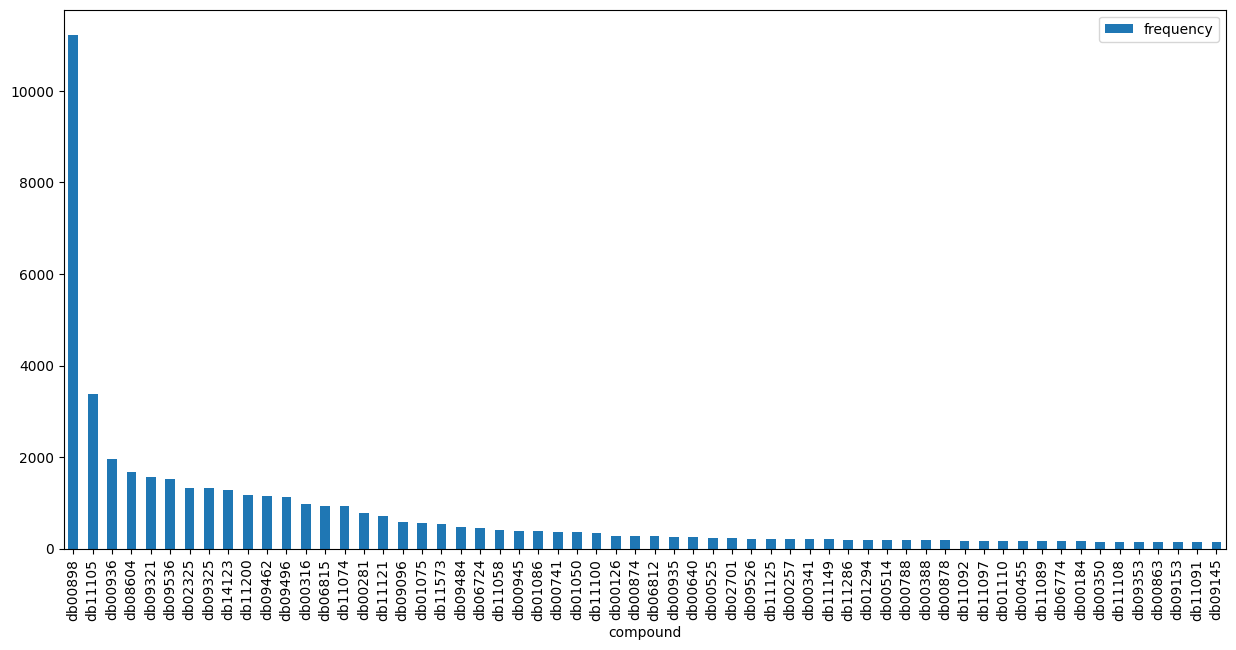

In [33]:
counts_ingredients_df = counts_ingredients_df.head(60)
counts_ingredients_df.plot.bar(x='compound', y='frequency', figsize=(15, 7))


### Typical compounds in interacting drugs

In [34]:
ddi = pd.read_csv("../data/triplets/ddi.tsv", sep='\t', index_col=[0])

In [38]:
drug_compound_dict = dict()
interacting_drugs = set(ddi.drug1)
interacting_drugs.union(set(ddi.drug2))

for d in interacting_drugs:
    drug_compound_dict[d] = list(drug_ingredients[drug_ingredients['ingredient'] == d].drug_name)
        
drug_compound_dict['DB00674'] # Galantamine

['galantamine',
 'razadyne',
 'galantamine hydrobromide',
 'pat-galantamine er',
 'mylan-galantamine er',
 'teva-galantamine er',
 'pms-galantamine er',
 'galantamine er',
 'reminyl -(4mg)',
 'reminyl -(8mg)',
 'reminyl -(12mg)',
 'apo-galantamine',
 'pms-galantamine',
 'sandoz galantamine er',
 'pendo-galantamine er',
 'ratio-galantamine',
 'auro-galantamine er',
 'ipg-galantamine er',
 'mar-galantamine er',
 'reminyl er']

In [39]:
inspected_drugs = []
typical_compounds = []

for row in ddi.itertuples():
    drug1 = row[1]
    effect = row[2]
    drug2 = row[3]

    if drug2 in inspected_drugs or drug1 in inspected_drugs:
        continue

    inspected_drugs.append(drug2)
  
    drug2_ingredients = drug_compound_dict.get(drug2)
    drug1_ingredients = drug_compound_dict.get(drug1)
    
    if drug1_ingredients is not None:
        typical_compounds += drug1_ingredients
    
    if drug2_ingredients is not None:
        typical_compounds += drug2_ingredients
        
typical_compounds        

['eliquis',
 'apixaban',
 'apixaban accord',
 'refludan',
 'stilboestrol tab 0.1mg',
 'stilboestrol tab 0.5mg',
 'stilbestrol 1.0mg tablet',
 'stilbestrol 0.5mg tablet',
 'honvol ampoules 250mg',
 'honvol tablets 100mg',
 'stilbestrol tablets 1.0 mg',
 'stilbestrol tablets 0.1 mg',
 'stilbestrol tablets 0.5 mg',
 'stilbestrol tab 1mg',
 'erbitux',
 'aranesp',
 'aranesp -(hsa-free)',
 'nespo',
 'ontak',
 'benlysta',
 'enbrel',
 'eticovo',
 'brenzys',
 'erelzi',
 'benepali',
 'nepexto',
 'eliquis',
 'apixaban',
 'apixaban accord',
 'angiomax',
 'bivalirudin in 0.9% sodium chloride',
 'bivalirudin',
 'angiomax rtu',
 'bivalirudin rtu',
 'bivalirudin for injection',
 'bivalirudin injection',
 'angiox',
 'elonva',
 'leuprolide acetate',
 'lupron depot',
 'lupron depot ped',
 'eligard',
 'lupron depot-ped',
 'lupron',
 'fensolvi',
 'leuprolide acetate injection',
 'zeulide depot',
 'camcevi',
 'eliquis',
 'apixaban',
 'apixaban accord',
 'activase',
 'cathflo activase',
 'cathflo',
 'cytoxan

In [44]:
counts_typical_compounds = Counter(typical_compounds)
counts_typical_compounds = dict(sorted(counts_typical_compounds.items(), key=lambda item: item[1], reverse=True))
counts_typical_compounds_df = pd.DataFrame(counts_typical_compounds.items(), columns=['compound', 'frequency'])
counts_typical_compounds_df.head()

,compound,frequency
0,xgeva,144
1,prolia,144
2,inbrija,78
3,buprenorphine hydrochloride,69
4,butrans,69


<Axes: xlabel='compound'>

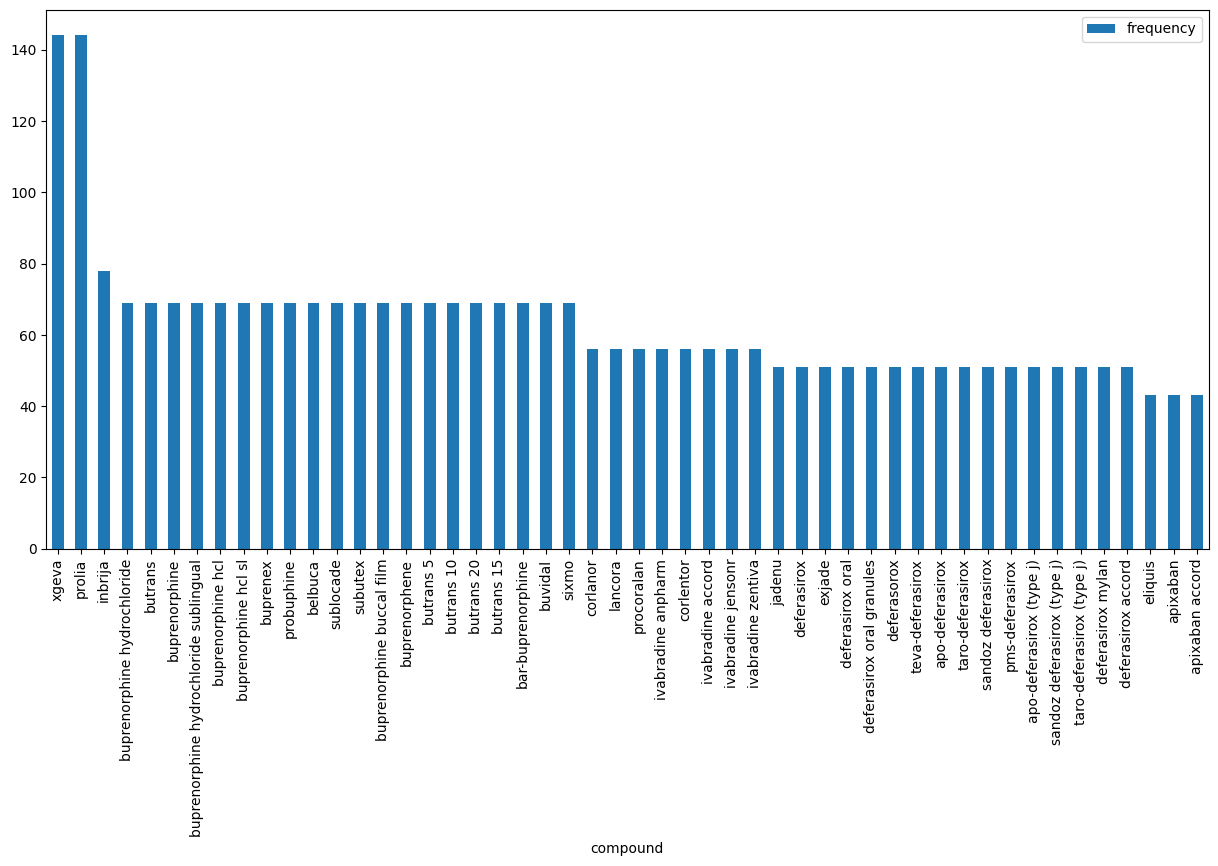

In [45]:
counts_typical_compounds_df = counts_typical_compounds_df.head(50)
counts_typical_compounds_df.plot.bar(x='compound', y='frequency', figsize=(15, 7))